In [82]:
import matplotlib.pyplot as plt
import numpy as np

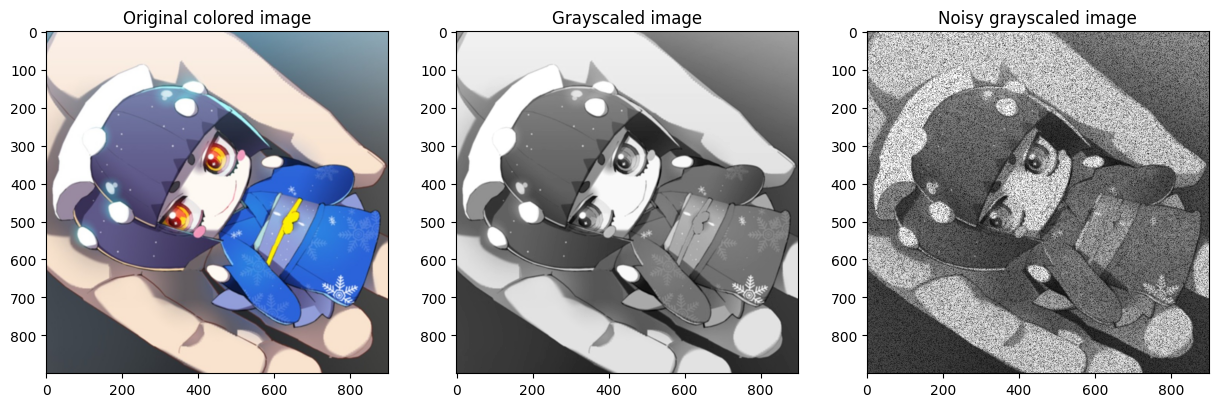

In [83]:
IMG_FILENAME = 't_necro_doll.jpg'

# Grayscale the image
IMG = plt.imread(IMG_FILENAME)
IMG_GRAY = np.mean(IMG, axis=2)

# Add salt and pepper noise to image
noise = IMG_GRAY.copy()
prob = 0.2
salt = np.random.rand(*noise.shape) < (prob/2)
pepper = np.random.rand(*noise.shape) < (prob/2)

IMG_NOISE = IMG_GRAY.copy()
IMG_NOISE[salt] = 0
IMG_NOISE[pepper] = 1

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(IMG)
ax[0].set_title('Original colored image')
ax[1].imshow(IMG_GRAY, cmap='gray')
ax[1].set_title('Grayscaled image')
ax[2].imshow(IMG_NOISE, cmap='gray')
ax[2].set_title('Noisy grayscaled image')
plt.show()

In [87]:
# Create nxn Gaussian blur kernel
def Gaussian(x, y, mux=0, muy=0, sigma=1):
    PDF = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((x-mux)**2 + (y-muy)**2) / (2*sigma))
    return PDF

n = 25
sigma = 20
kernel = np.zeros((n,n))
center = int(n/2 - 0.5)

for x in range(n):
    for y in range(n):
        kernel[x,y] = Gaussian(x, y, mux=center, muy=center, sigma=sigma)

print(kernel)

[[1.48922322e-05 2.64654405e-05 4.47387381e-05 7.19405261e-05
  1.10039539e-04 1.60106585e-04 2.21592421e-04 2.91733219e-04
  3.65344137e-04 4.35214821e-04 4.93163001e-04 5.31572583e-04
  5.45029407e-04 5.31572583e-04 4.93163001e-04 4.35214821e-04
  3.65344137e-04 2.91733219e-04 2.21592421e-04 1.60106585e-04
  1.10039539e-04 7.19405261e-05 4.47387381e-05 2.64654405e-05
  1.48922322e-05]
 [2.64654405e-05 4.70325423e-05 7.95065773e-05 1.27847705e-04
  1.95554625e-04 2.84530300e-04 3.93798655e-04 5.18448009e-04
  6.49264219e-04 7.73433545e-04 8.76415025e-04 9.44673865e-04
  9.68588397e-04 9.44673865e-04 8.76415025e-04 7.73433545e-04
  6.49264219e-04 5.18448009e-04 3.93798655e-04 2.84530300e-04
  1.95554625e-04 1.27847705e-04 7.95065773e-05 4.70325423e-05
  2.64654405e-05]
 [4.47387381e-05 7.95065773e-05 1.34402597e-04 2.16121284e-04
  3.30577046e-04 4.80986764e-04 6.65700421e-04 8.76415025e-04
  1.09755444e-03 1.30745758e-03 1.48154353e-03 1.59693229e-03
  1.63735883e-03 1.59693229e-03 1.

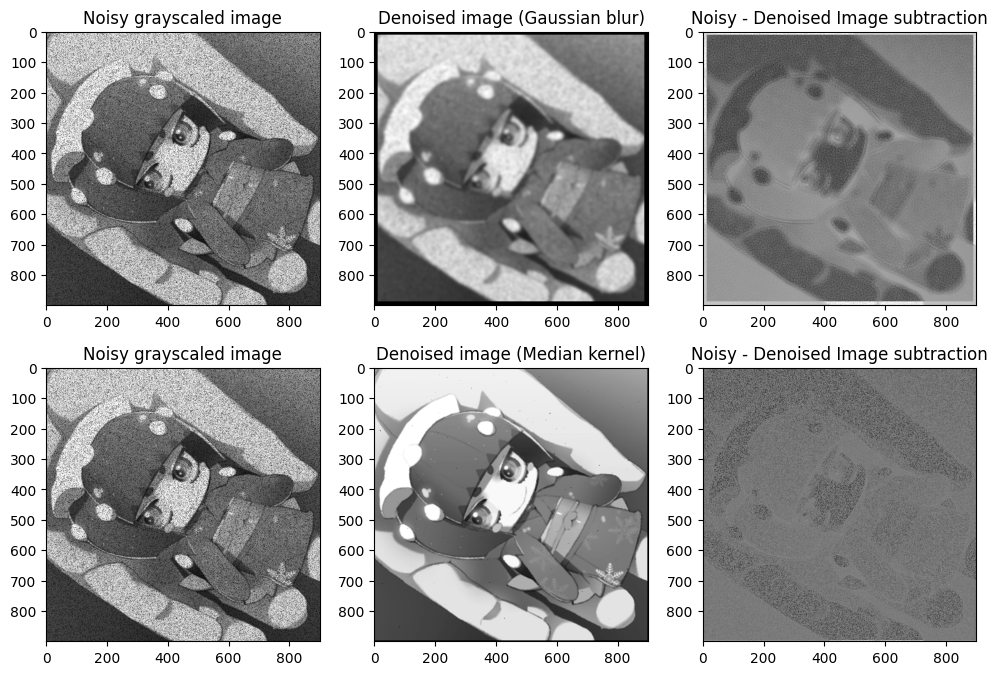

In [88]:
# Convolution of kernel with noisy image
IMG_BLUR = np.zeros_like(IMG_NOISE)
IMG_MEDN = np.zeros_like(IMG_NOISE)
s = IMG_BLUR.shape[0]

# GAUSSIAN BLUR
for y in range(center, s-center):
    for x in range(center, s-center):
        IMG_BLUR[x,y] = np.sum(IMG_NOISE[x-center:x+center+1,y-center:y+center+1] * kernel)  

# 5x5 MEDIAN KERNEL DENOISING
for y in range(2, s-2):
    for x in range(2, s-2):
        IMG_MEDN[x,y] = np.median(IMG_NOISE[x-2:x+2+1,y-2:y+2+1])

fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax[0,0].imshow(IMG_NOISE, cmap='gray')
ax[0,0].set_title('Noisy grayscaled image')
ax[0,1].imshow(IMG_BLUR, cmap='gray')
ax[0,1].set_title('Denoised image (Gaussian blur)')
ax[0,2].imshow(IMG_NOISE-IMG_BLUR, cmap='gray')
ax[0,2].set_title('Noisy - Denoised Image subtraction')

ax[1,0].imshow(IMG_NOISE, cmap='gray')
ax[1,0].set_title('Noisy grayscaled image')
ax[1,1].imshow(IMG_MEDN, cmap='gray')
ax[1,1].set_title('Denoised image (Median kernel)')
ax[1,2].imshow(IMG_NOISE-IMG_MEDN, cmap='gray')
ax[1,2].set_title('Noisy - Denoised Image subtraction')

plt.show()